In [1]:

# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Loading Database

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [36]:
df=pd.read_csv('zomato.csv.zip')

In [89]:
df.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Bengaluru,Jalsa,Yes,Yes,4.0,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet,Banashankari
1,Bengaluru,Spice Elephant,Yes,No,4.0,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet,Banashankari
2,Bengaluru,San Churro Cafe,Yes,No,3.0,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Buffet,Banashankari
3,Bengaluru,Addhuri Udupi Bhojana,No,No,3.0,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet,Banashankari
4,Bengaluru,Grand Village,No,No,3.0,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Buffet,Banashankari


In [90]:
df.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Bengaluru,Jalsa,Yes,Yes,4.0,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet,Banashankari
1,Bengaluru,Spice Elephant,Yes,No,4.0,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet,Banashankari
2,Bengaluru,San Churro Cafe,Yes,No,3.0,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Buffet,Banashankari
3,Bengaluru,Addhuri Udupi Bhojana,No,No,3.0,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet,Banashankari
4,Bengaluru,Grand Village,No,No,3.0,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Buffet,Banashankari


# Shape of Dataset

In [91]:
df.shape

(51148, 12)

In [92]:
df.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'approx_cost(for two people)',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

# Deleting redundant columns

In [93]:
drop_columns_list=['url','phone', 'reviews_list', 'menu_item']
df.drop(drop_columns_list,axis=1,inplace=True)

KeyError: "['url', 'phone', 'reviews_list', 'menu_item'] not found in axis"

In [ ]:
df.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Buffet,Banashankari


# Dataset dtype info

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   address                      51717 non-null  object
 1   name                         51717 non-null  object
 2   online_order                 51717 non-null  object
 3   book_table                   51717 non-null  object
 4   rate                         43942 non-null  object
 5   votes                        51717 non-null  int64 
 6   location                     51696 non-null  object
 7   rest_type                    51490 non-null  object
 8   dish_liked                   23639 non-null  object
 9   cuisines                     51672 non-null  object
 10  approx_cost(for two people)  51371 non-null  object
 11  listed_in(type)              51717 non-null  object
 12  listed_in(city)              51717 non-null  object
dtypes: int64(1), object(12)
memory 

# Cleaning "address" column for future usecase

In [94]:
df['address'] = df['address'].str.split(',').str[-1].str.strip()
df['address'] = df['address'].str.replace(r'Bangalore|Banglore', 'Bengaluru', case=False, regex=True)

In [95]:
df.isnull().sum()

address                        0
name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
location                       0
rest_type                      0
cuisines                       0
approx_cost(for two people)    0
listed_in(type)                0
listed_in(city)                0
dtype: int64

# Percentage of missing value in each column

In [96]:
df.isnull().mean()*100

address                        0.0
name                           0.0
online_order                   0.0
book_table                     0.0
rate                           0.0
votes                          0.0
location                       0.0
rest_type                      0.0
cuisines                       0.0
approx_cost(for two people)    0.0
listed_in(type)                0.0
listed_in(city)                0.0
dtype: float64

# droping "dish_liked" column because it has more than 50% missing values

In [97]:
df.drop('dish_liked',axis=1,inplace=True)

KeyError: "['dish_liked'] not found in axis"

In [ ]:
df.shape

(51717, 12)

In [ ]:
df.isnull().sum()

address                           0
name                              0
online_order                      0
book_table                        0
rate                           7775
votes                             0
location                         21
rest_type                       227
cuisines                         45
approx_cost(for two people)     346
listed_in(type)                   0
listed_in(city)                   0
dtype: int64

In [ ]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

# Cleaning "Rate" column (Reason -> "rate" column have -> {nan , " /", "/","_"})

In [ ]:
df['rate']=df['rate'].str.strip('/').str[0].str.strip()
df['rate']=df['rate'].str.strip(' /').str[0].str.strip()
df['rate']=df['rate'].str.strip('_').str[0].str.strip()
df['rate']=pd.to_numeric(df['rate'],errors='coerce')
df['rate']=df['rate'].astype(float)
df['rate']=df['rate'].fillna(0)
df['rate'].unique()

array([4., 3., 2., 0., 1.])

In [ ]:
df.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Bengaluru,Jalsa,Yes,Yes,4.0,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Bengaluru,Spice Elephant,Yes,No,4.0,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,Bengaluru,San Churro Cafe,Yes,No,3.0,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Bengaluru,Addhuri Udupi Bhojana,No,No,3.0,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Bengaluru,Grand Village,No,No,3.0,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [ ]:
df.isnull().sum()

address                          0
name                             0
online_order                     0
book_table                       0
rate                             0
votes                            0
location                        21
rest_type                      227
cuisines                        45
approx_cost(for two people)    346
listed_in(type)                  0
listed_in(city)                  0
dtype: int64

# deleting rest of the NAN value (Row wise)

In [ ]:
df.dropna(inplace=True)

In [98]:
df.reset_index(drop=True, inplace=True)

In [99]:
df.isnull().sum()

address                        0
name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
location                       0
rest_type                      0
cuisines                       0
approx_cost(for two people)    0
listed_in(type)                0
listed_in(city)                0
dtype: int64

In [100]:
df.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Bengaluru,Jalsa,Yes,Yes,4.0,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet,Banashankari
1,Bengaluru,Spice Elephant,Yes,No,4.0,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet,Banashankari
2,Bengaluru,San Churro Cafe,Yes,No,3.0,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Buffet,Banashankari
3,Bengaluru,Addhuri Udupi Bhojana,No,No,3.0,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet,Banashankari
4,Bengaluru,Grand Village,No,No,3.0,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Buffet,Banashankari


# Cleaning 'approx_cost(for two people)' and changing its dtype

In [101]:
df['approx_cost(for two people)'].unique()

array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        900.,  200.,  750.,  150.,  850.,  100., 1200.,  350.,  250.,
        950., 1000., 1500., 1300.,  199.,   80., 1100.,  160., 1600.,
        230.,  130.,   50.,  190., 1700., 1400.,  180., 1350., 2200.,
       2000., 1800., 1900.,  330., 2500., 2100., 3000., 2800., 3400.,
         40., 1250., 3500., 4000., 2400., 2600.,  120., 1450.,  469.,
         70., 3200.,   60.,  560.,  240.,  360., 6000., 1050., 2300.,
       4100., 5000., 3700., 1650., 2700., 4500.,  140.])

In [102]:
df['approx_cost(for two people)']=df['approx_cost(for two people)'].str.replace(',','')
df['approx_cost(for two people)'].unique()

AttributeError: Can only use .str accessor with string values!

In [ ]:
df['approx_cost(for two people)']=df['approx_cost(for two people)'].astype('float')

In [ ]:
df.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Bengaluru,Jalsa,Yes,Yes,4.0,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet,Banashankari
1,Bengaluru,Spice Elephant,Yes,No,4.0,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet,Banashankari
2,Bengaluru,San Churro Cafe,Yes,No,3.0,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Buffet,Banashankari
3,Bengaluru,Addhuri Udupi Bhojana,No,No,3.0,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet,Banashankari
4,Bengaluru,Grand Village,No,No,3.0,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Buffet,Banashankari


Text(0, 0.5, 'Online Order Percentage')

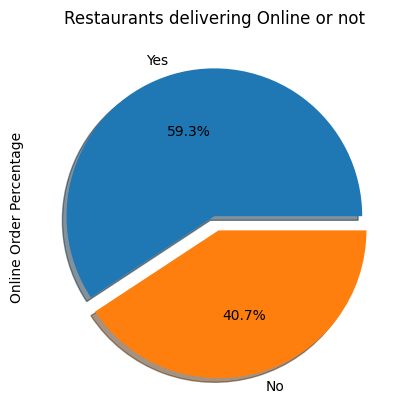

In [ ]:
df['online_order'].value_counts().plot(kind='pie', autopct="%0.1f%%", explode=[0, 0.1], shadow=True)
plt.title('Restaurants delivering Online or not')
plt.ylabel('Online Order Percentage')

Text(0, 0.5, 'book percentage')

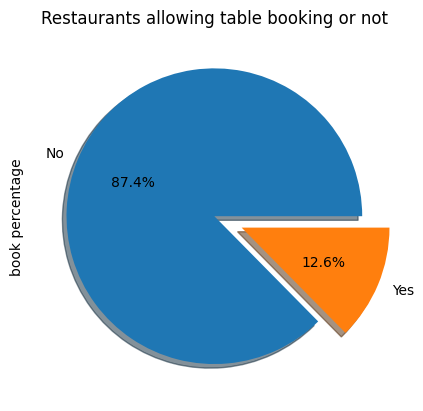

In [ ]:
df['book_table'].value_counts().plot(kind='pie', autopct="%0.1f%%", explode=[0, 0.2], shadow=True)
plt.title('Restaurants allowing table booking or not')
plt.ylabel('book percentage')

# Table booking Rate vs Rate

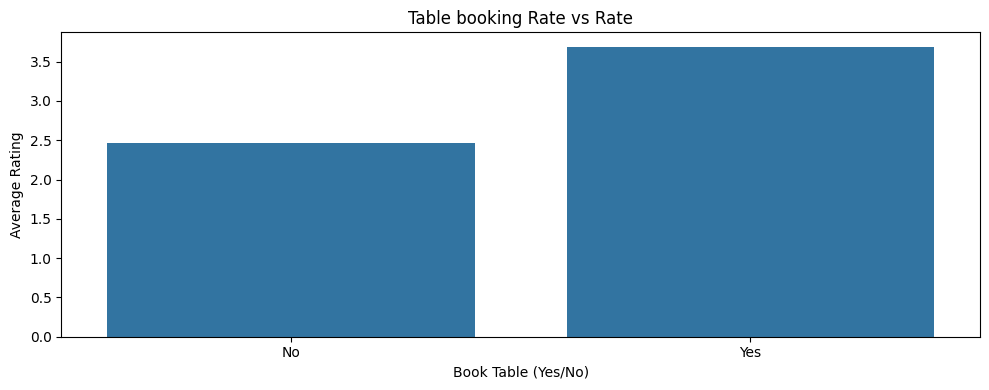

In [ ]:
group_df=df.groupby('book_table')['rate'].mean().reset_index()
plt.figure(figsize=(10,4))
sns.barplot(data=group_df,x='book_table',y='rate')
plt.title('Table booking Rate vs Rate')
plt.xlabel('Book Table (Yes/No)')
plt.ylabel('Average Rating')
plt.tight_layout()
plt.show()

# best location 

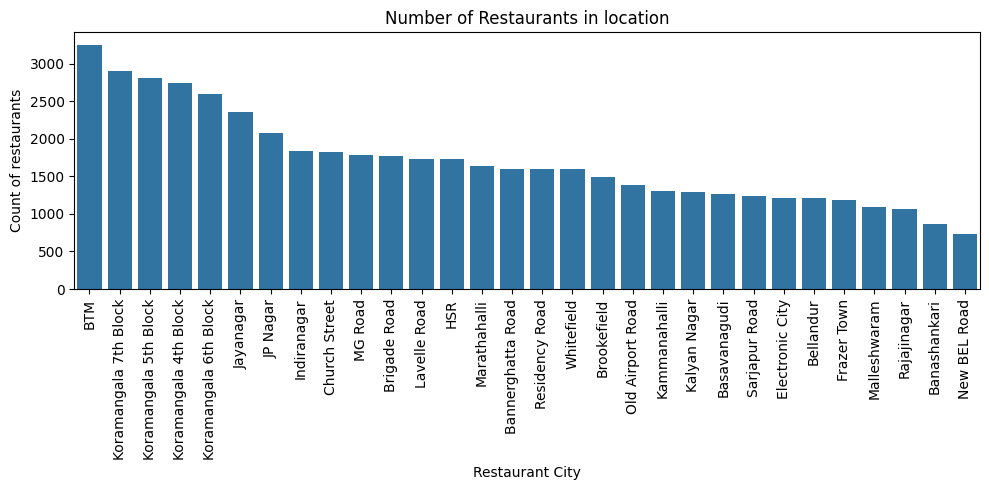

In [103]:
best_city_df=df["listed_in(city)"].value_counts().reset_index()
best_city_df.columns=['city','count']
plt.figure(figsize=(10,5))
sns.barplot(data=best_city_df,x='city',y='count')
plt.xlabel('Restaurant City')
plt.ylabel('Count of restaurants')
plt.title('Number of Restaurants in location')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Relation between Location and Rating

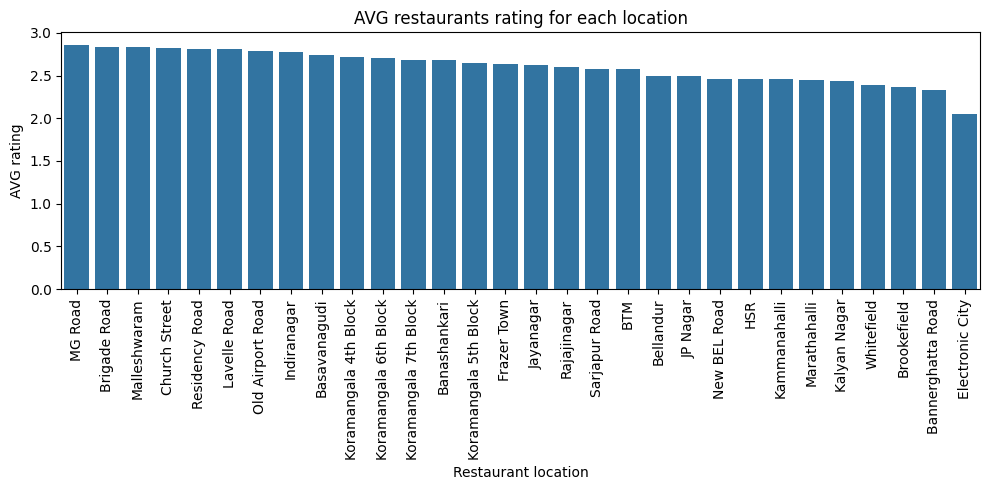

In [104]:
# Relation between Location and Rating
best_location_rating=df.groupby('listed_in(city)')['rate'].mean().reset_index()
best_location_rating=best_location_rating.sort_values(by='rate',ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(data=best_location_rating,x='listed_in(city)',y='rate')
plt.xlabel('Restaurant location')
plt.ylabel('AVG rating')
plt.title('AVG restaurants rating for each location')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Restaurant Type

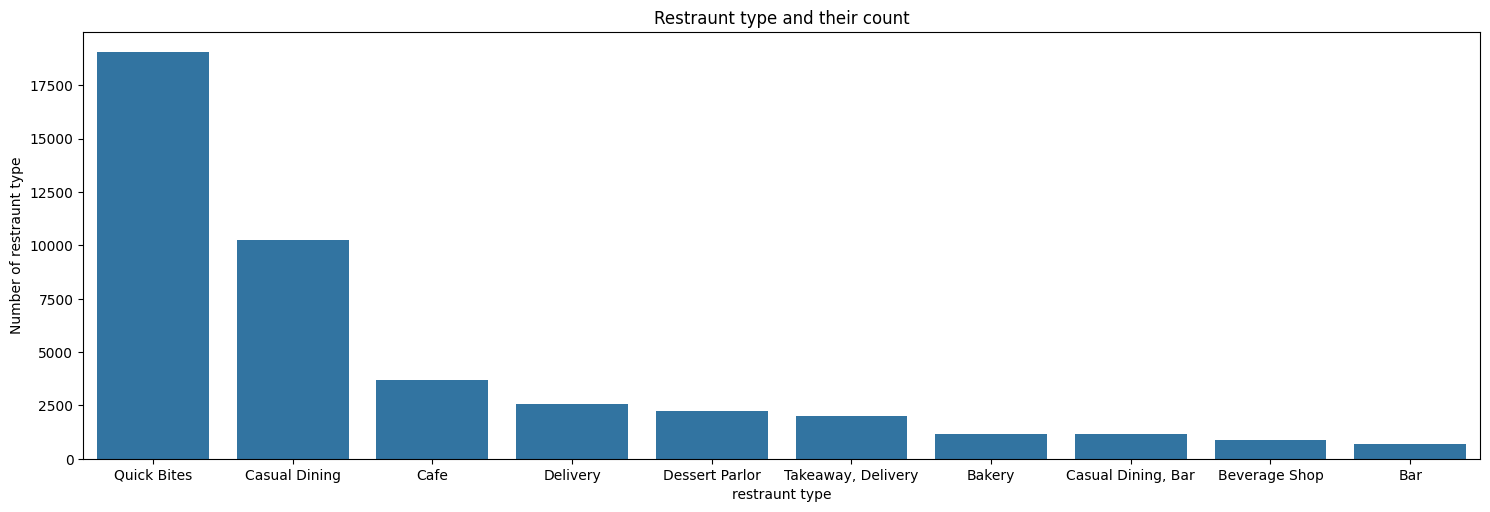

In [105]:
y=df["rest_type"].value_counts()[:10]
x=y.index
plt.figure(figsize=(15,5))
sns.barplot(x=x,y=y)
plt.ylabel("Number of restraunt type")
plt.xlabel("restraunt type")
plt.tight_layout()
plt.title("Restraunt type and their count")
plt.show()

# Gaussian Rest type and Rating

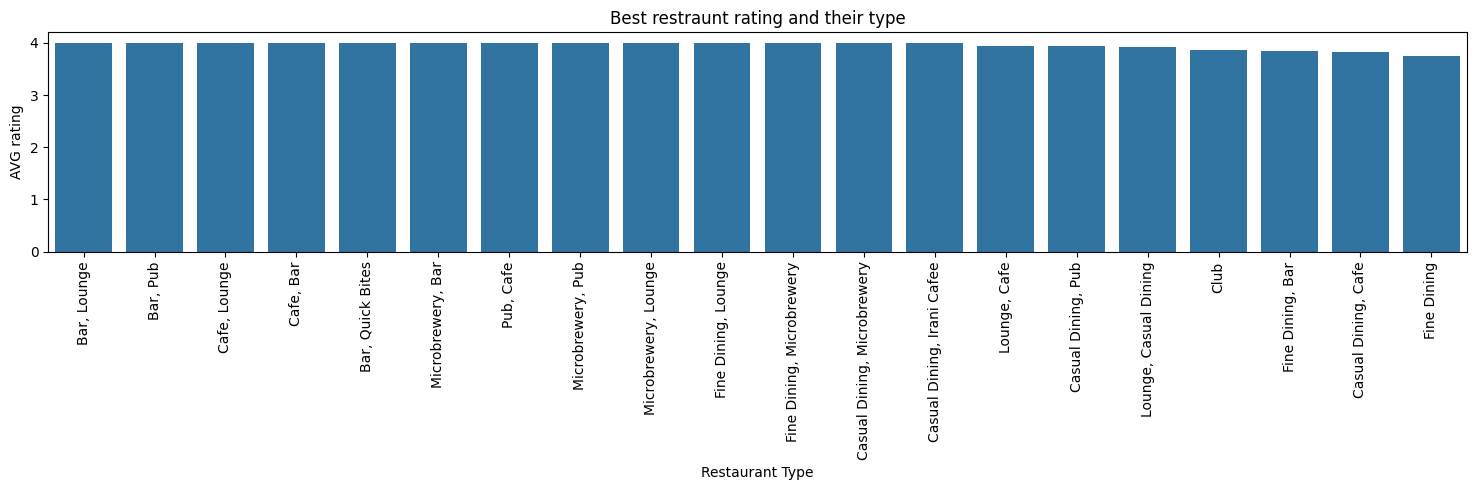

In [106]:
# Rest_type and Rating
rest_type_df=df.groupby('rest_type')['rate'].mean().reset_index()
rest_type_df=rest_type_df.sort_values(by='rate',ascending=False).head(20)
plt.figure(figsize=(15,5))
sns.barplot(data=rest_type_df,x='rest_type',y='rate')
plt.xlabel('Restaurant Type')
plt.ylabel('AVG rating')
plt.title('Best restraunt rating and their type')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# types of services

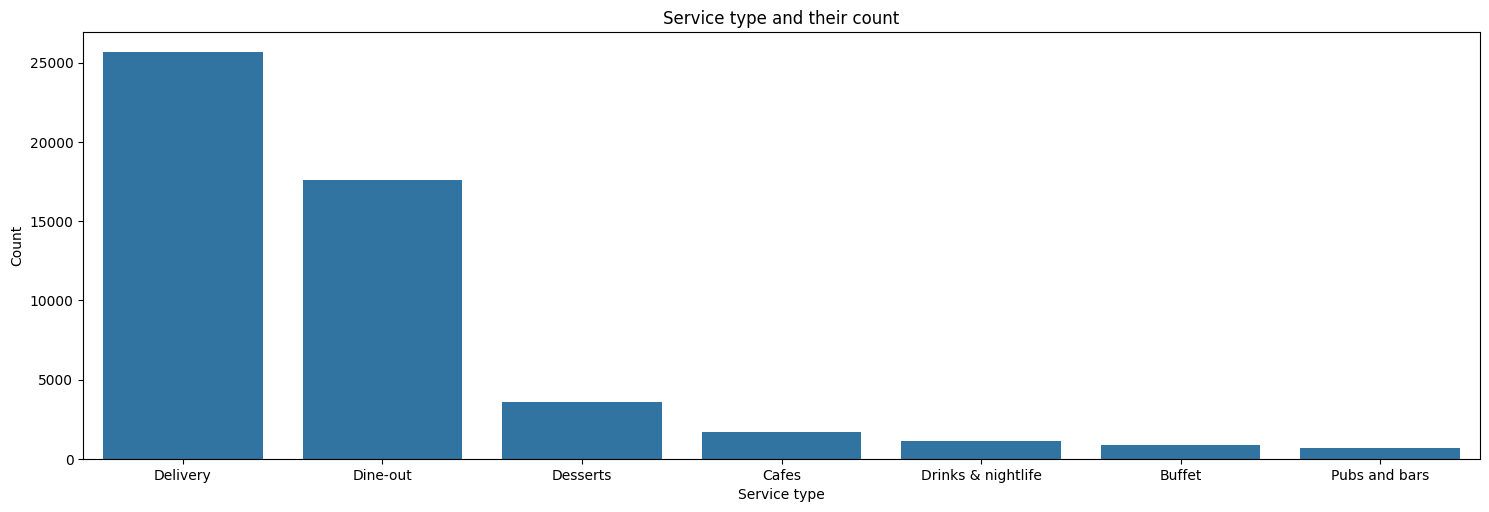

In [107]:
# Types of Services
servis_type_df=df['listed_in(type)'].value_counts().reset_index()
plt.figure(figsize=(15,5))
sns.barplot(data=servis_type_df,x='listed_in(type)',y='count')
plt.ylabel("Count")
plt.xlabel("Service type")
plt.tight_layout()
plt.title("Service type and their count")
plt.show()

# Relation Between Types And Rating

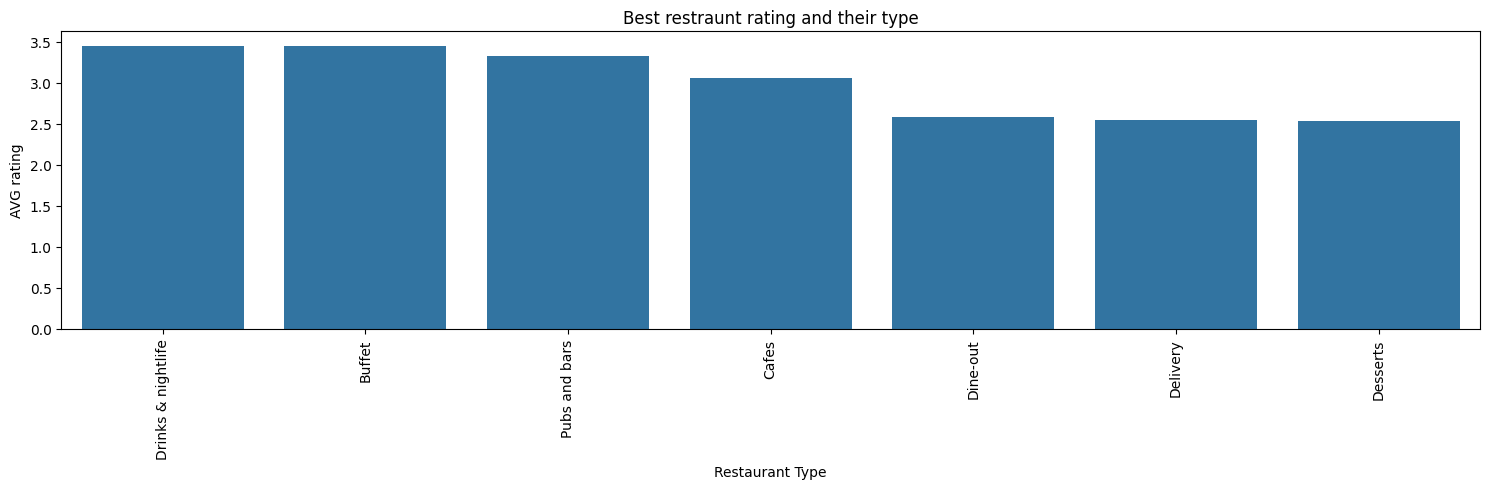

In [108]:
# Relation between Type and Rating
listed_type_df=df.groupby('listed_in(type)')['rate'].mean().reset_index()
listed_type_df=listed_type_df.sort_values(by='rate',ascending=False).head(20)
plt.figure(figsize=(15,5))
sns.barplot(data=listed_type_df,x='listed_in(type)',y='rate')
plt.xlabel('Restaurant Type')
plt.ylabel('AVG rating')
plt.title('Best restraunt rating and their type')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Cost of restaurant

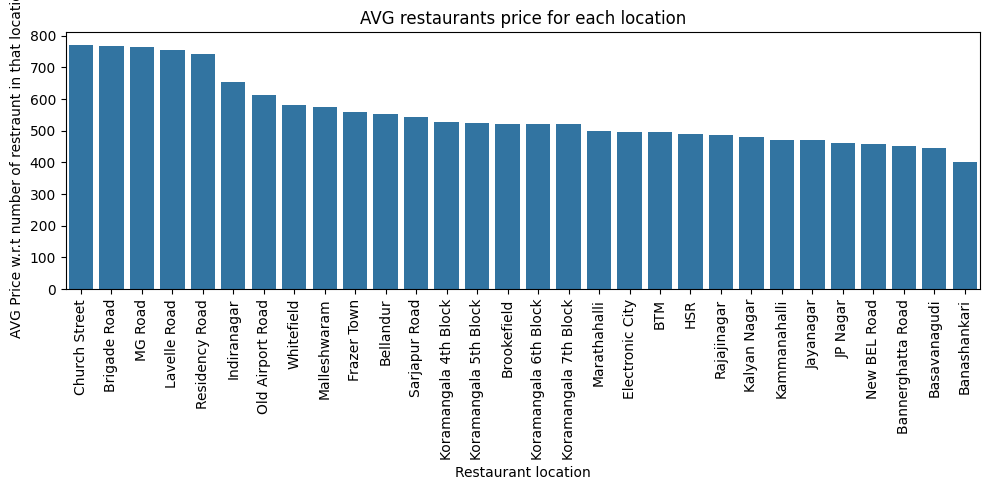

In [80]:
# Cost of Restaurant
rest_cost_df=df.groupby('listed_in(city)')['approx_cost(for two people)'].mean().reset_index()
rest_cost_df=rest_cost_df.sort_values(by='approx_cost(for two people)',ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(data=rest_cost_df,x='listed_in(city)',y='approx_cost(for two people)')
plt.xlabel('Restaurant location')
plt.ylabel('AVG Price w.r.t number of restraunt in that location')
plt.title('AVG restaurants price for each location')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


# No . of Restaurent in Location 

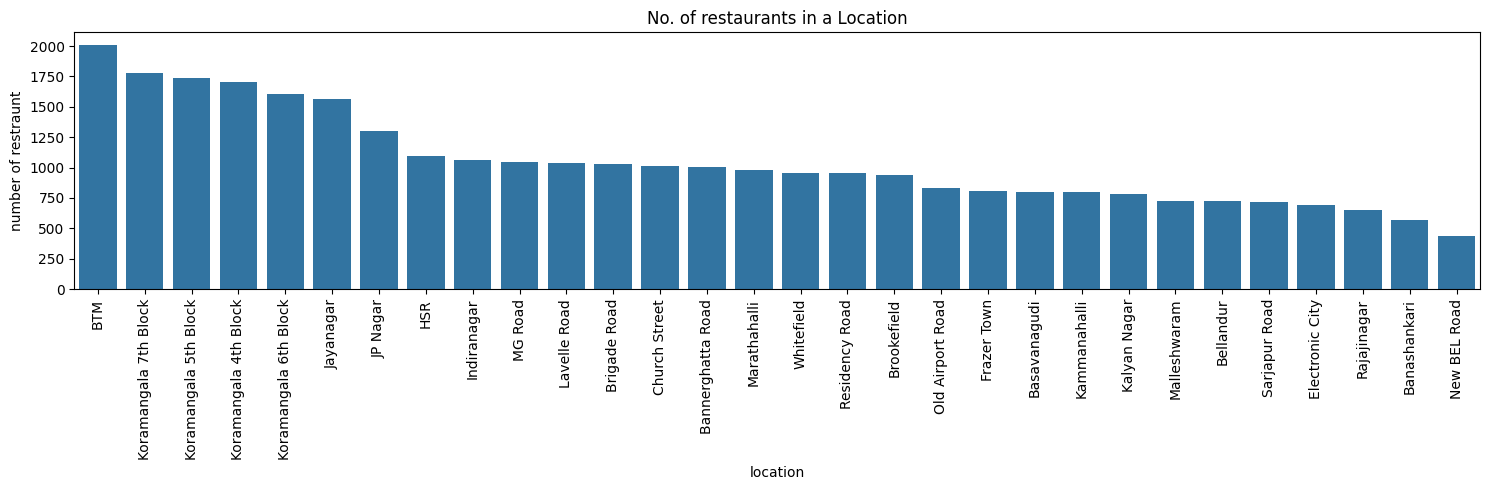

In [81]:
# No. of restaurants in a Location

no_of_rest_in_location_df=df.groupby('listed_in(city)')['name'].nunique().reset_index()
no_of_rest_in_location_df=no_of_rest_in_location_df.sort_values(by='name',ascending=False)
plt.figure(figsize=(15,5))
sns.barplot(data=no_of_rest_in_location_df,x='listed_in(city)',y='name')
plt.xlabel('location')
plt.ylabel('number of restraunt')
plt.title('No. of restaurants in a Location')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [82]:
df.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Bengaluru,Jalsa,Yes,Yes,4.0,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet,Banashankari
1,Bengaluru,Spice Elephant,Yes,No,4.0,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet,Banashankari
2,Bengaluru,San Churro Cafe,Yes,No,3.0,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Buffet,Banashankari
3,Bengaluru,Addhuri Udupi Bhojana,No,No,3.0,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet,Banashankari
4,Bengaluru,Grand Village,No,No,3.0,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Buffet,Banashankari


# Most famous restaurant chains in Bengaluru

In [83]:
# Most famous restaurant chains in Bengaluru
df['address'].value_counts()

address
Bengaluru                        48517
Delivery Only                      127
Karnataka                           84
Whitefield                          82
1st Stage                           77
                                 ...  
Basaveshwara Nagar Bengaluru         1
Reliable Residency Layout            1
Opp Sigma Tech Park Bengaluru        1
Kadugodi                             1
Karnataka 560048                     1
Name: count, Length: 303, dtype: int64

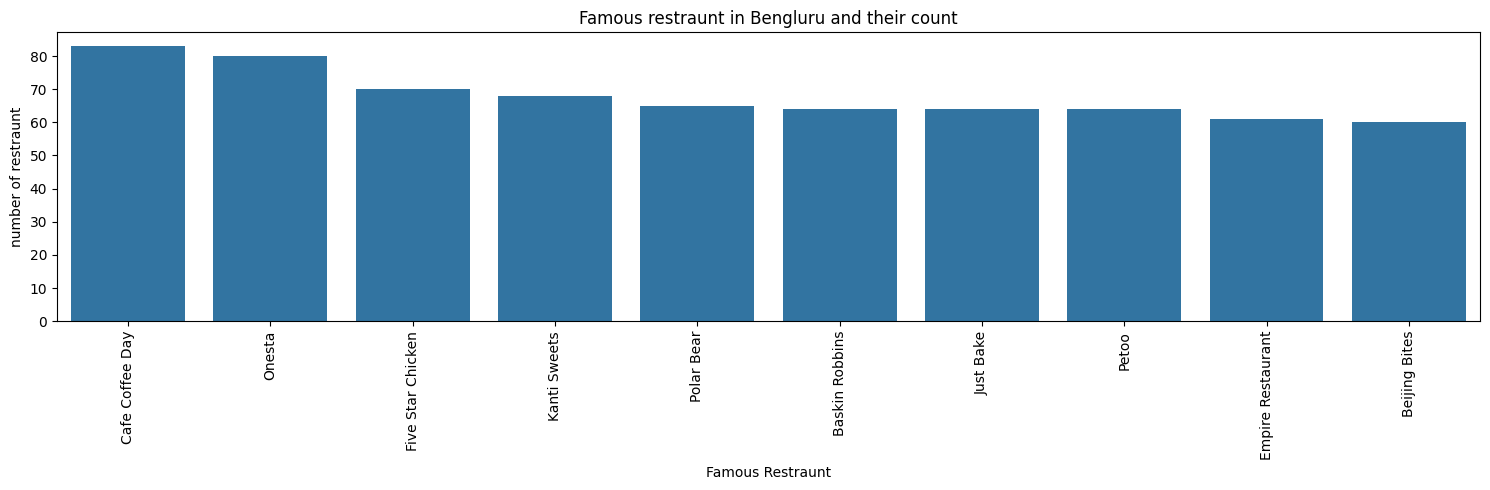

In [84]:
bengaluru_restaurants=df[df['address'].str.contains('Bengaluru', case=False)]
top_restaurants = bengaluru_restaurants.groupby('name').size().reset_index(name='count')
top_10_restaurants = top_restaurants.sort_values(by='count', ascending=False).head(10)
plt.figure(figsize=(15,5))
sns.barplot(data=top_10_restaurants,x='name',y='count')
plt.xlabel('Famous Restraunt')
plt.ylabel('number of restraunt')
plt.title('Famous restraunt in Bengluru and their count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Thank You.....